In [164]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ttest_ind
from scipy.stats import levene

In [305]:
df = pd.read_csv('./player_feedback_total.csv')
df['type'] = np.where(df['video_language'] == df['interactor_language'], 'monolingual', 'crosslingual')

df_dialogue = df[df['subject'] == 'Dialogue']
df_subtitles = df[df['subject'] == 'Subtitles']
print(f'Total interactions: {df_dialogue.shape}')
df_monolingual = df_dialogue[df_dialogue['video_language'] == df_dialogue['interactor_language']]
print(f'Monolingual interactions: {df_monolingual.shape}')
df_crosslingual = df_dialogue[df_dialogue['video_language'] != df_dialogue['interactor_language']]
print(f'Crosslingual interactions: {df_crosslingual.shape}')


Total interactions: (717, 11)
Monolingual interactions: (360, 11)
Crosslingual interactions: (357, 11)


In [304]:

df_monolingual_sub = df_subtitles[df_subtitles['video_language'] == df_subtitles['interactor_language']]
df_crosslingual_sub = df_subtitles[df_subtitles['video_language'] != df_subtitles['interactor_language']]

print(df_monolingual_sub['rating'].mean())
print(df_crosslingual_sub['rating'].mean())

4.511111111111111
4.526610644257703


In [174]:
df_en_en = df_dialogue[(df_dialogue['video_language'] == 'en-US') & (df_dialogue['interactor_language'] == 'en-US')]

df_en_es = df_dialogue[(df_dialogue['video_language'] == 'en-US') & (df_dialogue['interactor_language'] == 'es-ES')]
df_es_en = df_dialogue[(df_dialogue['video_language'] == 'es-ES') & (df_dialogue['interactor_language'] == 'en-US')]
df_es_es = df_dialogue[(df_dialogue['video_language'] == 'es-ES') & (df_dialogue['interactor_language'] == 'es-ES')]

df_en_ar = df_dialogue[(df_dialogue['video_language'] == 'en-US') & (df_dialogue['interactor_language'] == 'ar-AE')]
df_ar_en = df_dialogue[(df_dialogue['video_language'] == 'ar-AE') & (df_dialogue['interactor_language'] == 'en-US')]
df_ar_ar = df_dialogue[(df_dialogue['video_language'] == 'ar-AE') & (df_dialogue['interactor_language'] == 'ar-AE')]

# All groups

In [175]:
df_a_en_en = df_dialogue[(df_dialogue['toia_id'] == 6) & (df_dialogue['interactor_language'] == 'en-US')]
df_b_en_en = df_dialogue[(df_dialogue['toia_id'] == 5) & (df_dialogue['interactor_language'] == 'en-US')]

df_a_en_es = df_dialogue[(df_dialogue['toia_id'] == 6) & (df_dialogue['interactor_language'] == 'es-ES')]
df_a_es_en = df_dialogue[(df_dialogue['toia_id'] == 7) & (df_dialogue['interactor_language'] == 'en-US')]
df_a_es_es = df_dialogue[(df_dialogue['toia_id'] == 7) & (df_dialogue['interactor_language'] == 'es-ES')]

df_b_en_ar = df_dialogue[(df_dialogue['toia_id'] == 5) & (df_dialogue['interactor_language'] == 'ar-AE')]
df_b_ar_en = df_dialogue[(df_dialogue['toia_id'] == 8) & (df_dialogue['interactor_language'] == 'en-US')]
df_b_ar_ar = df_dialogue[(df_dialogue['toia_id'] == 8) & (df_dialogue['interactor_language'] == 'ar-AE')]


In [176]:
print(df_a_en_en['rating'].mean())
print(df_a_en_es['rating'].mean())
print(df_a_es_en['rating'].mean())
print(df_a_es_es['rating'].mean())

print(df_b_en_en['rating'].mean())
print(df_b_en_ar['rating'].mean())
print(df_b_ar_en['rating'].mean())
print(df_b_ar_ar['rating'].mean())


2.8155339805825244
3.198019801980198
2.8529411764705883
3.323529411764706
2.4266666666666667
2.3625
2.1486486486486487
2.45


In [300]:

df_a_en_en = df_subtitles[(df_subtitles['toia_id'] == 6) & (df_subtitles['interactor_language'] == 'en-US')]
df_b_en_en = df_subtitles[(df_subtitles['toia_id'] == 5) & (df_subtitles['interactor_language'] == 'en-US')]

df_a_en_es = df_subtitles[(df_subtitles['toia_id'] == 6) & (df_subtitles['interactor_language'] == 'es-ES')]
df_a_es_en = df_subtitles[(df_subtitles['toia_id'] == 7) & (df_subtitles['interactor_language'] == 'en-US')]
df_a_es_es = df_subtitles[(df_subtitles['toia_id'] == 7) & (df_subtitles['interactor_language'] == 'es-ES')]

df_b_en_ar = df_subtitles[(df_subtitles['toia_id'] == 5) & (df_subtitles['interactor_language'] == 'ar-AE')]
df_b_ar_en = df_subtitles[(df_subtitles['toia_id'] == 8) & (df_subtitles['interactor_language'] == 'en-US')]
df_b_ar_ar = df_subtitles[(df_subtitles['toia_id'] == 8) & (df_subtitles['interactor_language'] == 'ar-AE')]

In [301]:
print(df_a_en_en['rating'].mean())
print(df_a_en_es['rating'].mean())
print(df_a_es_en['rating'].mean())
print(df_a_es_es['rating'].mean())

print(df_b_en_en['rating'].mean())
print(df_b_en_ar['rating'].mean())
print(df_b_ar_en['rating'].mean())
print(df_b_ar_ar['rating'].mean())


4.213592233009709
4.603960396039604
4.490196078431373
5.0
3.96
4.45
4.554054054054054
4.7875


In [269]:
# print(df_a_en_en.groupby('rating')['rating'].count())
# print(df_a_en_es.groupby('rating')['rating'].count())
# print(df_a_es_en.groupby('rating')['rating'].count())
# print(df_a_es_es.groupby('rating')['rating'].count())

# print(df_b_en_en.groupby('rating')['rating'].count())
# print(df_b_en_ar.groupby('rating')['rating'].count())
# print(df_b_ar_en.groupby('rating')['rating'].count())
print(df_b_ar_ar.groupby('rating')['rating'].count())


rating
1    30
2    13
3    17
4    11
5     9
Name: rating, dtype: int64


# SET A vs SET B with interactor language

In [177]:
df_a_en = df_dialogue[((df_dialogue['toia_id'] == 6) | (df_dialogue['toia_id'] == 7)) & (df_dialogue['interactor_language'] == 'en-US')]
df_a_es = df_dialogue[((df_dialogue['toia_id'] == 6) | (df_dialogue['toia_id'] == 7)) & (df_dialogue['interactor_language'] == 'es-ES')]

df_b_en = df_dialogue[((df_dialogue['toia_id'] == 5) | (df_dialogue['toia_id'] == 8)) & (df_dialogue['interactor_language'] == 'en-US')]
df_b_ar = df_dialogue[((df_dialogue['toia_id'] == 5) | (df_dialogue['toia_id'] == 8)) & (df_dialogue['interactor_language'] == 'ar-AE')]

In [178]:
print(df_a_en['rating'].mean())
print(df_a_es['rating'].mean())
print(df_b_en['rating'].mean())
print(df_b_ar['rating'].mean())

2.8341463414634145
3.2610837438423643
2.2885906040268456
2.40625


In [270]:

print(df_a_en.groupby('rating')['rating'].count())
print(df_a_es.groupby('rating')['rating'].count())
print(df_b_en.groupby('rating')['rating'].count())
print(df_b_ar.groupby('rating')['rating'].count())

rating
1    57
2    38
3    39
4    24
5    47
Name: rating, dtype: int64
rating
1    15
2    54
3    45
4    41
5    48
Name: rating, dtype: int64
rating
1    56
2    42
3    15
4    24
5    12
Name: rating, dtype: int64
rating
1    58
2    26
3    44
4    17
5    15
Name: rating, dtype: int64


# SET A vs SET B

In [272]:
df_a_en = df_dialogue[(df_dialogue['toia_id'] == 6)]
df_a_es = df_dialogue[(df_dialogue['toia_id'] == 7)]

df_b_en = df_dialogue[(df_dialogue['toia_id'] == 5)]
df_b_ar = df_dialogue[(df_dialogue['toia_id'] == 8)]

In [273]:
print(df_a_en.groupby('rating')['rating'].count())
print(df_a_es.groupby('rating')['rating'].count())
print(df_b_en.groupby('rating')['rating'].count())
print(df_b_ar.groupby('rating')['rating'].count())

rating
1    38
2    48
3    38
4    35
5    45
Name: rating, dtype: int64
rating
1    34
2    44
3    46
4    30
5    50
Name: rating, dtype: int64
rating
1    54
2    35
3    30
4    23
5    13
Name: rating, dtype: int64
rating
1    60
2    33
3    29
4    18
5    14
Name: rating, dtype: int64


In [290]:
print(df_a_en['rating'].mean())
print(df_a_es['rating'].mean())
print(df_b_en['rating'].mean())
print(df_b_ar['rating'].mean())

3.0049019607843137
3.088235294117647
2.393548387096774
2.3051948051948052


# SET A vs SET B regardless of interaction language

In [179]:

df_a = df_dialogue[((df_dialogue['toia_id'] == 6) | (df_dialogue['toia_id'] == 7))]

df_b = df_dialogue[((df_dialogue['toia_id'] == 5) | (df_dialogue['toia_id'] == 8))]

In [180]:
print(df_a['rating'].mean())
print(df_b['rating'].mean())

3.0465686274509802
2.349514563106796


In [274]:
print(df_a.groupby('rating')['rating'].count())
print(df_b.groupby('rating')['rating'].count())

rating
1    72
2    92
3    84
4    65
5    95
Name: rating, dtype: int64
rating
1    114
2     68
3     59
4     41
5     27
Name: rating, dtype: int64


In [181]:
df_dialogue.head()

,timestamp,video_id,toia_id,user_id,question,rating,video_language,interactor_language,similarity_score,subject,type
0,1682500245158,Zyad_5_215_5ba20de7.mp4,5,11,What is your name?,5,en-US,en-US,0.409903,Dialogue,monolingual
3,1682500247062,Zyad_8_229_2cba727f.mp4,8,11,What is your name?,5,ar-AE,en-US,0.835117,Dialogue,crosslingual
4,1682500341805,Zyad_5_214_c08bc279.mp4,5,11,Where were you? Born?,1,en-US,en-US,0.513753,Dialogue,monolingual
6,1682500343822,Zyad_8_230_948f8af1.mp4,8,11,Where were you? Born?,5,ar-AE,en-US,0.651956,Dialogue,crosslingual
8,1682500401425,Zyad_5_257_a60d6b09.mp4,5,11,Do you have any siblings?,1,en-US,en-US,0.330594,Dialogue,monolingual


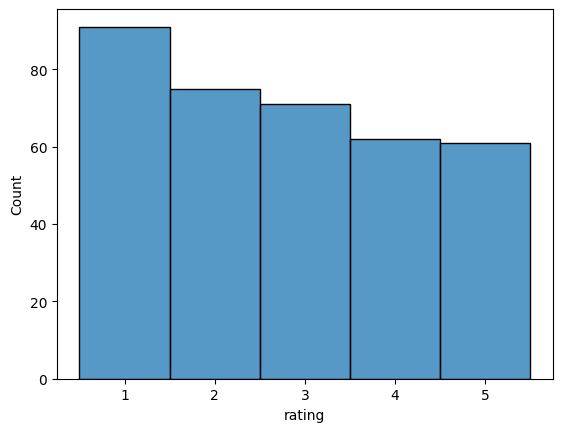

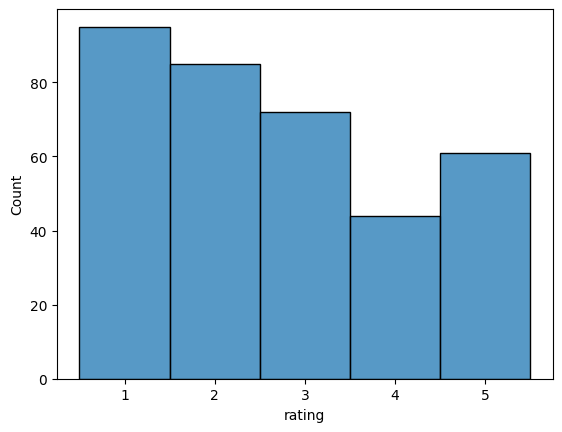

In [291]:
# distribution of ratings in crosslingual and monoglingual interactions

sns.histplot(data=df_monolingual, x ="rating", discrete=True)
# plt.title("Monolingual")
plt.show()
sns.histplot(data=df_crosslingual, x ="rating", discrete=True)
# plt.title("Crosslingual")
plt.show()

In [281]:
print(df_monolingual.groupby('rating')['rating'].count())
print(df_crosslingual.groupby('rating')['rating'].count())

rating
1    91
2    75
3    71
4    62
5    61
Name: rating, dtype: int64
rating
1    95
2    85
3    72
4    44
5    61
Name: rating, dtype: int64


In [184]:
mono_rating = df_monolingual['rating']
cross_rating = df_crosslingual['rating']

In [185]:
# Levene's test for equal variance
stat, p_val = levene(mono_rating, cross_rating)
print(stat, p_val)

0.0008190467680300708 0.9771764499700656


In [289]:
# Null hypothesis is that monolingual interactions perform the same as or worse than crosslingual interactions using multilingual embeddings
# Alternative hypothesis is that monolingual interactions perform better than crosslingual interactions using multilingual embeddings

# Perform a two-sample t-test
t_stat, p_val = ttest_ind(cross_rating, mono_rating, equal_var=True)
print(t_stat, p_val)

# p value is 0.335 which is > 0.05 so we fail to reject the null hypothesis

-0.9640930567649197 0.33532522351473715


In [187]:
print(f"Monolingual: {sum(mono_rating)/len(mono_rating)}")
print(f"Crosslingual: {sum(cross_rating)/len(cross_rating)}")

Monolingual: 2.797222222222222
Crosslingual: 2.6946778711484596


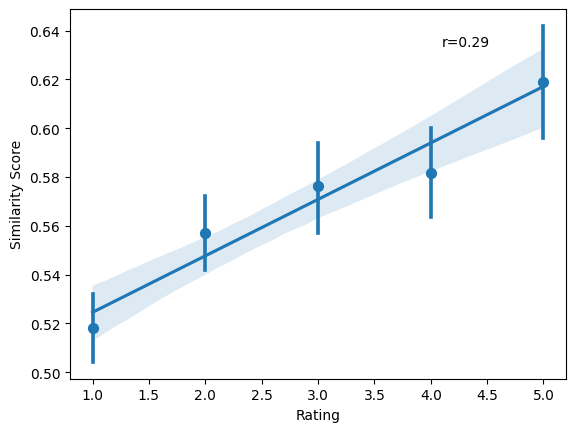

In [297]:
from scipy.stats import pearsonr
ax = sns.regplot(df_dialogue, x='rating', y='similarity_score', x_estimator=np.mean, x_ci=95)
plt.xlabel('Rating')
plt.ylabel('Similarity Score')
# plt.title('Rating vs Cosine Similarity')
# call the scipy function for pearson correlation
r, p = pearsonr(x=df_dialogue['rating'], y=df_dialogue['similarity_score'])
# annotate the pearson correlation coefficient text to 2 decimal places
plt.text(.75, .9, 'r={:.2f}'.format(r), transform=ax.transAxes)

plt.show()

In [82]:
survey = pd.read_csv('./TOIA Multilingual User Experience Study (Responses) - Form Responses 1.csv', index_col=0)
survey.head()

,First Name,Last Name,Email,Age,Gender,Which avatar are you interacting with,Please confirm the name of the avatar you interacted with?,Which language did you speak in?,How long was your interaction with the pair of avatars?,Rate your experience with the Avatar [Ease in finding answers to your questions (excluding questions that you were informed had no prerecorded answers to)],...,How was the experience of talking to the avatar in English vs Arabic? (approx. 100 words),Rate your experience with the quality of technology [Quality of sound],Rate your experience with the quality of technology [Quality of video],Rate your experience with the quality of technology [Ease in using the interface],Rate your experience with the quality of technology [Quality of subtitles],How was the experience of talking to the avatar in English vs Spanish? (approx. 100 words),Rate your experience with the quality of technology [Quality of sound].1,Rate your experience with the quality of technology [Quality of video].1,Rate your experience with the quality of technology [Ease in using the interface].1,Rate your experience with the quality of technology [Quality of subtitles].1
Timestamp,,,,,,,,,,,,,,,,,,,,,
4/26/2023 13:48:46,Habiba,Eldababy,hed279@nyu.edu,21,Female,Zyad (Arabic),Zyad,English,15-20 min,2.0,...,It was a fun experience to ask the avatar ques...,5.0,4.0,4.0,5.0,NaN,NaN,NaN,NaN,NaN
4/27/2023 12:54:52,Ziad,El Sayed,ze2012@nyu.edu,20,Male,Zyad (Arabic),Zyad,English,10-15 min,4.0,...,Speaking to the avatar in English and in Arabi...,5.0,5.0,3.0,4.0,NaN,NaN,NaN,NaN,NaN
4/27/2023 13:32:59,Abed,Amad,aa7301@nyu.edu,21,Male,Zyad (Arabic),Zeyad,English,10-15 min,3.0,...,The experience of talking to both felt natural...,4.0,4.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN
4/28/2023 14:41:13,Manuel,Padilla,map971@nyu.edu,22,Male,Andrea (Spanish),NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,It was impressively close to a conversation. I...,5.0,5.0,5.0,5.0
4/28/2023 16:54:13,Thais,Alvarenga,ata381@nyu.edu,22,Female,Andrea (Spanish),NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,I think that the English version was better. I...,5.0,5.0,3.0,5.0


In [189]:
print(survey['How long was your interaction with the pair of avatars?'].dropna().str.split(' ').apply(lambda x : x[0].split('-')).apply(lambda x: (int(x[0])+int(x[1]))/2).mean())
print(survey['How long was your interaction with the pair of avatars?.1'].dropna().str.split(' ').apply(lambda x : x[0].split('-')).apply(lambda x: (int(x[0])+int(x[1]))/2).mean())
print(survey['How long was your interaction with the pair of avatars?.2'].dropna().str.split(' ').apply(lambda x : x[0].split('-')).apply(lambda x: (int(x[0])+int(x[1]))/2 if x[0] != "20+" else 20).mean())
print(survey['How long was your interaction with the pair of avatars?.3'].dropna().str.split(' ').apply(lambda x : x[0].split('-')).apply(lambda x: (int(x[0])+int(x[1]))/2 if x[0] != "20+" else 20).mean())

13.5
12.5
18.0
17.5


In [190]:
print(survey.groupby(['Which interaction did you prefer? (Language you speak in vs Language of the avatar)'])['Which interaction did you prefer? (Language you speak in vs Language of the avatar)'].count())
print(survey.groupby(['Which interaction did you prefer? (Language you speak in vs Language of the avatar).1'])['Which interaction did you prefer? (Language you speak in vs Language of the avatar).1'].count())
print(survey.groupby(['Which interaction did you prefer? (Language you speak in vs Language of the avatar).2'])['Which interaction did you prefer? (Language you speak in vs Language of the avatar).2'].count())
print(survey.groupby(['Which interaction did you prefer? (Language you speak in vs Language of the avatar).3'])['Which interaction did you prefer? (Language you speak in vs Language of the avatar).3'].count())

Which interaction did you prefer? (Language you speak in vs Language of the avatar)
English/Arabic     2
English/English    3
Name: Which interaction did you prefer? (Language you speak in vs Language of the avatar), dtype: int64
Which interaction did you prefer? (Language you speak in vs Language of the avatar).1
Arabic/Arabic     4
Arabic/English    1
Name: Which interaction did you prefer? (Language you speak in vs Language of the avatar).1, dtype: int64
Which interaction did you prefer? (Language you speak in vs Language of the avatar).2
English/English    3
English/Spanish    2
Name: Which interaction did you prefer? (Language you speak in vs Language of the avatar).2, dtype: int64
Which interaction did you prefer? (Language you speak in vs Language of the avatar).3
English/Spanish    1
Spanish/Spanish    4
Name: Which interaction did you prefer? (Language you speak in vs Language of the avatar).3, dtype: int64


In [101]:
pd.set_option('display.max_colwidth', None)
survey['How was the experience of talking to the avatar in English vs Arabic? (approx. 100 words)'].dropna()

Timestamp
4/26/2023 13:48:46    It was a fun experience to ask the avatar questions and see their answers. Even when the answers were wrong it was interesting to see the difference between the English and Arabic answers and compare them. I expected the English to perform better, but I was surprised to hear the Arabic answers were correct more often. I am not sure what the intended use of the avatar is, but I found it fun to talk to, so regardless of the usage it seems nice. I believe if it has more answers it will be even more engaging since right now it often returns the same answer over and over again. The Arabic version was more engaging at this point since it returned more accurate answers. Since I know the person who is the avatar for the video and we usually speak in Arabic to each other, speaking in Arabic felt more natural than English.
4/27/2023 12:54:52                                                                                                                             

# Similarity score 

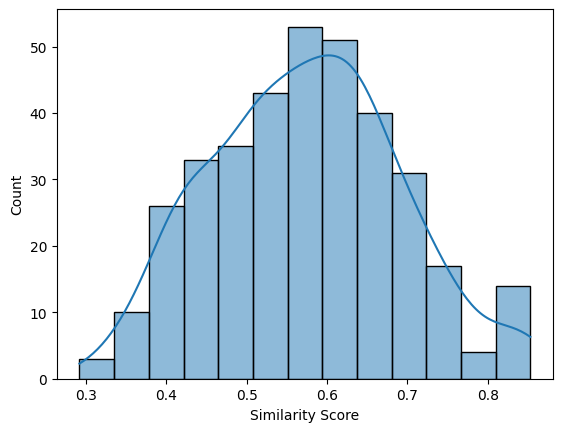

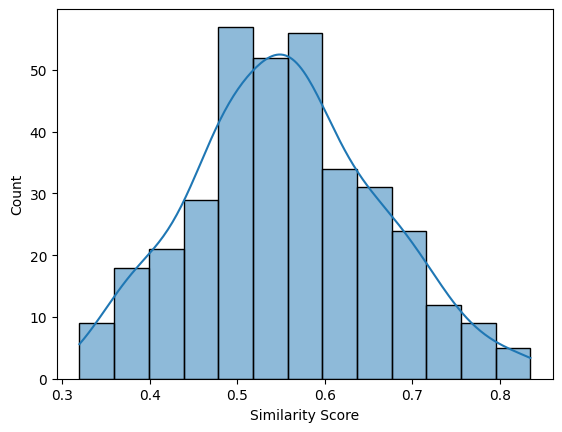

In [306]:
sns.histplot(data=df_monolingual, x ="similarity_score", kde=True)
# plt.title("Monolingual")
plt.xlabel("Similarity Score")
plt.show()
sns.histplot(data=df_crosslingual, x ="similarity_score", kde=True)
# plt.title("Crosslingual")
plt.xlabel("Similarity Score")
plt.show()

In [307]:
# Levene's test for equal variance
stat, p_val = levene(df_monolingual['similarity_score'], df_crosslingual['similarity_score'])
print(stat, p_val)

# less than 0.05 so we cannot make the assumption that there is equal variance

4.0639587951925975 0.04418125415275743


In [308]:
# Perform a two-sample t-test
# Welch's t-test for non-equal variance
t_stat, p_val = ttest_ind(df_monolingual['similarity_score'], df_crosslingual['similarity_score'], equal_var=False)
print(t_stat, p_val)

# p value less than 0.05 so statististically significant difference between the similarity scores of monolingual and crosslingual interactions

2.2504463490678472 0.02472592405666475


# ratings vs duration

In [194]:
# Zyad English
print(survey['How long was your interaction with the pair of avatars?'].dropna().str.split(' ').apply(lambda x : x[0].split('-')).apply(lambda x: (int(x[0])+int(x[1]))/2))
# Zyad Arabic
print(survey['How long was your interaction with the pair of avatars?.1'].dropna().str.split(' ').apply(lambda x : x[0].split('-')).apply(lambda x: (int(x[0])+int(x[1]))/2))
# Andrea English
print(survey['How long was your interaction with the pair of avatars?.2'].dropna().str.split(' ').apply(lambda x : x[0].split('-')).apply(lambda x: (int(x[0])+int(x[1]))/2 if x[0] != "20+" else 10))
# Andrea Spanish
print(survey['How long was your interaction with the pair of avatars?.3'].dropna().str.split(' ').apply(lambda x : x[0].split('-')).apply(lambda x: (int(x[0])+int(x[1])/2) if x[0] != "20+" else 10))

Timestamp
4/26/2023 13:48:46    17.5
4/27/2023 12:54:52    12.5
4/27/2023 13:32:59    12.5
4/29/2023 17:50:31    12.5
4/30/2023 17:46:36    12.5
Name: How long was your interaction with the pair of avatars?, dtype: float64
Timestamp
4/26/2023 13:48:46    12.5
4/27/2023 12:54:52    12.5
4/27/2023 13:32:59    12.5
4/29/2023 17:50:31    12.5
4/30/2023 17:46:36    12.5
Name: How long was your interaction with the pair of avatars?.1, dtype: float64
Timestamp
4/28/2023 14:41:13    17.5
4/28/2023 16:54:13    10.0
4/28/2023 17:52:11    17.5
4/29/2023 13:59:11    17.5
4/29/2023 16:43:58    17.5
Name: How long was your interaction with the pair of avatars?.2, dtype: float64
Timestamp
4/28/2023 14:41:13    10.0
4/28/2023 16:54:13    10.0
4/28/2023 17:52:11    25.0
4/29/2023 13:59:11    25.0
4/29/2023 16:43:58    17.5
Name: How long was your interaction with the pair of avatars?.3, dtype: float64


In [200]:
df_a_en = df_dialogue[((df_dialogue['toia_id'] == 6) | (df_dialogue['toia_id'] == 7)) & (df_dialogue['interactor_language'] == 'en-US')]
print(df_a_en.groupby('user_id').agg({'rating': np.mean}))

df_a_es = df_dialogue[((df_dialogue['toia_id'] == 6) | (df_dialogue['toia_id'] == 7)) & (df_dialogue['interactor_language'] == 'es-ES')]
print(df_a_es.groupby('user_id').agg({'rating': np.mean}))

df_b_en = df_dialogue[((df_dialogue['toia_id'] == 5) | (df_dialogue['toia_id'] == 8)) & (df_dialogue['interactor_language'] == 'en-US')]
print(df_b_en.groupby('user_id').agg({'rating': np.mean}))

df_b_ar = df_dialogue[((df_dialogue['toia_id'] == 5) | (df_dialogue['toia_id'] == 8)) & (df_dialogue['interactor_language'] == 'ar-AE')]
print(df_b_ar.groupby('user_id').agg({'rating': np.mean}))


           rating
user_id          
18       3.166667
22       3.150943
26       3.200000
28       1.750000
30       2.887097
           rating
user_id          
19       2.600000
23       3.296875
27       2.964286
29       3.093750
31       3.777778
           rating
user_id          
11       1.571429
14       2.750000
16       2.739130
32       2.294118
34       2.035714
           rating
user_id          
13       1.692308
15       2.583333
17       2.350000
33       2.480000
35       2.750000


In [246]:
interaction_times = df_dialogue.groupby('user_id').agg({'timestamp': ['min', 'max'], 'rating': 'mean'})
interaction_times['min'] = pd.to_datetime(interaction_times['timestamp']['min'], unit='ms')
interaction_times['max'] = pd.to_datetime(interaction_times['timestamp']['max'], unit='ms')
interaction_times['diff'] = (interaction_times['max'] - interaction_times['min']).dt.total_seconds() / 60
interaction_times.reset_index(inplace=True)

user_id      timestamp                   rating                     min  \
                      min            max      mean                           
0       11  1682500245158  1682500997620  1.571429 2023-04-26 09:10:45.158   
1       13  1682501281451  1682501903468  1.692308 2023-04-26 09:28:01.451   
2       14  1682583004289  1682584085306  2.750000 2023-04-27 08:10:04.289   
3       15  1682584331953  1682585486513  2.583333 2023-04-27 08:32:11.953   
4       16  1682586446264  1682587072185  2.739130 2023-04-27 09:07:26.264   
5       17  1682587339709  1682587774300  2.350000 2023-04-27 09:22:19.709   
6       18  1682675264040  1682676099615  3.166667 2023-04-28 09:47:44.040   
7       19  1682676652850  1682678195731  2.600000 2023-04-28 10:10:52.850   
8       22  1682682084564  1682683917859  3.150943 2023-04-28 11:41:24.564   
9       23  1682684182553  1682686060484  3.296875 2023-04-28 12:16:22.553   
10      26  1682687406489  1682688379181  3.200000 2023-04-28 13:10:06.489   
11      27  1682688828705  1682689495246  2.964286 2023-04-28 13:33:48.705   
12      28  1682770166445  1682771082879  1.750000 2023-04-29 12:09:26.445   
13      29  1682771293524  1682772038772  3.093750 2023-04-29 12:28:13.524   
14      30  1682759015276  1682760635255  2.887097 2023-04-29 09:03:35.276   
15      31  1682760910241  1682762103215  3.777778 2023-04-29 09:35:10.241   
16      32  1682773226711  1682774173273  2.294118 2023-04-29 13:00:26.711   
17      33  1682774311447  1682775889064  2.480000 2023-04-29 13:18:31.447   
18      34  1682860595322  1682861265024  2.035714 2023-04-30 13:16:35.322   
19      35  1682861459802  1682862100193  2.750000 2023-04-30 13:30:59.802   

                       max       diff  
                                       
0  2023-04-26 09:23:17.620  12.541033  
1  2023-04-26 09:38:23.468  10.366950  
2  2023-04-27 08:28:05.306  18.016950  
3  2023-04-27 08:51:26.513  19.242667  
4  2023-04-27 09:17:52.185  10.432017  
5  2023-04-27 09:29:34.300   7.243183  
6  2023-04-28 10:01:39.615  13.926250  
7  2023-04-28 10:36:35.731  25.714683  
8  2023-04-28 12:11:57.859  30.554917  
9  2023-04-28 12:47:40.484  31.298850  
10 2023-04-28 13:26:19.181  16.211533  
11 2023-04-28 13:44:55.246  11.109017  
12 2023-04-29 12:24:42.879  15.273900  
13 2023-04-29 12:40:38.772  12.420800  
14 2023-04-29 09:30:35.255  26.999650  
15 2023-04-29 09:55:03.215  19.882900  
16 2023-04-29 13:16:13.273  15.776033  
17 2023-04-29 13:44:49.064  26.293617  
18 2023-04-30 13:27:45.024  11.161700  
19 2023-04-30 13:41:40.193  10.673183

In [239]:
zyad_english = [11, 14, 16, 32, 34]
zyad_arabic = [13, 15, 17, 33, 35]

andrea_english = [18, 22, 26, 28, 30]
andrea_spanish = [19, 23, 27, 29, 31] 

In [242]:
print(interaction_times[interaction_times['user_id'].isin(zyad_english)]['diff'].mean())
print(interaction_times[interaction_times['user_id'].isin(zyad_arabic)]['diff'].mean())
print(interaction_times[interaction_times['user_id'].isin(andrea_english)]['diff'].mean())
print(interaction_times[interaction_times['user_id'].isin(andrea_spanish)]['diff'].mean())

13.585546666666668
14.763919999999999
20.59325
20.085250000000002


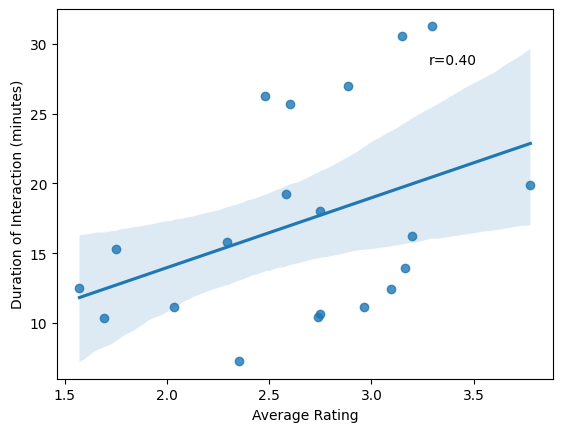

In [253]:
from scipy.stats import pearsonr
ax = sns.regplot(interaction_times, x='rating', y='diff')
plt.xlabel('Average Rating')
plt.ylabel('Duration of Interaction (minutes)')
# plt.title('Rating vs Cosine Similarity')
# call the scipy function for pearson correlation
r, p = pearsonr(x=interaction_times['rating']['mean'], y=interaction_times['diff'])
# annotate the pearson correlation coefficient text to 2 decimal places
plt.text(.75, .85, 'r={:.2f}'.format(r), transform=ax.transAxes)

plt.show()